In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [462]:
X,y = make_blobs(n_samples= 500,n_features=2,centers=5,random_state= 3)

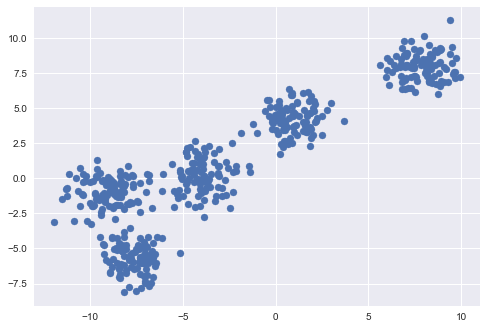

In [463]:
plt.figure(0)
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1])

In [587]:
k = 5 
color =["green","red","blue","yellow","orange"]
clusters = {}
for i in range(k):
    center = (2*np.random.random((X.shape[1],))-1)*10
    points = []
    cluster = {
        "center":center,
        "points":points,
        "color":color[i]
    }
    clusters[i] =cluster
clusters    

{0: {'center': array([-7.25908459, -9.0871495 ]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-0.13391396, -3.18234852]),
  'points': [],
  'color': 'red'},
 2: {'center': array([-7.26566265,  7.41611565]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-5.62906224,  0.58587925]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-1.74365992, -4.58065234]),
  'points': [],
  'color': 'orange'}}

In [588]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [589]:
## Assign every data to one clusters
def assignPointsToClussters(clusters):  ##E-step
    for ix in range(X.shape[0]):
        dist = []
        curr_X= X[ix]
        for kx in range(k):
            dist.append(distance([curr_X],clusters[kx]['center']))
        near_point = np.argmin(dist)
        clusters[near_point]['points'].append(curr_X)
def UpdateClusters(clusters):     ## M - step
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        clusters[kx]['points'] = []
        if pts.shape[0]==0:
            continue
        new_center = np.mean(pts,axis=0)
        clusters[kx]["center"] = new_center 
def plotClusters(clusters):
    for kx in range(k):
        print(len(clusters[kx]['points']))
        pts = np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        uk = clusters[kx]["center"]
        plt.scatter(uk[0],uk[1],color = "black",marker="*")
    plt.show()    
    

94
145
13
243
5


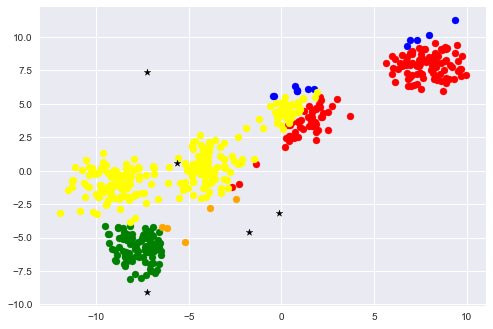

In [590]:
    assignPointsToClussters(clusters)
    plotClusters(clusters)
    UpdateClusters(clusters)

99
100
100
103
98


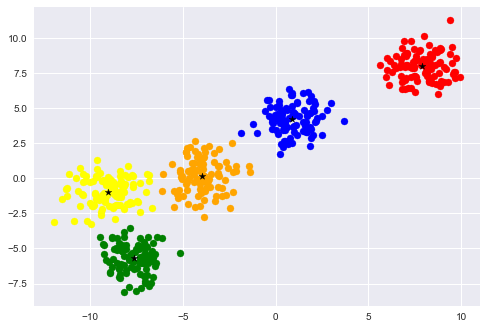

In [597]:
    assignPointsToClussters(clusters)
    plotClusters(clusters)
    UpdateClusters(clusters)

## Kmean ++

In [598]:
from sklearn.cluster import KMeans

In [621]:
## better than our algo implemented above as our can stuck at local minima but sklearn gives global minima
kmeans = KMeans(n_clusters=5)

In [622]:
kmeans.fit(X,y)

KMeans(n_clusters=5)

In [623]:
centers = kmeans.cluster_centers_
pred = kmeans.labels_

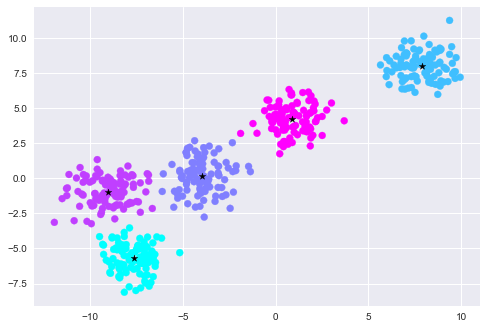

In [624]:

plt.figure(0)
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=pred,cmap="cool")
plt.scatter(centers[:,0],centers[:,1],color ="black",marker='*')

In [625]:
pred

array([0, 1, 2, 0, 0, 2, 3, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 4, 4,
       0, 2, 0, 4, 3, 3, 2, 3, 0, 3, 4, 4, 0, 4, 1, 1, 0, 4, 4, 4, 3, 3,
       2, 1, 1, 3, 3, 3, 1, 0, 3, 0, 0, 4, 0, 0, 1, 2, 1, 2, 2, 0, 3, 1,
       2, 2, 4, 2, 4, 0, 4, 0, 4, 2, 0, 3, 4, 4, 2, 4, 2, 3, 1, 3, 2, 1,
       3, 2, 3, 4, 0, 4, 4, 1, 0, 2, 2, 4, 1, 4, 2, 2, 1, 1, 1, 2, 2, 0,
       1, 3, 0, 1, 2, 4, 1, 3, 4, 2, 1, 2, 3, 0, 4, 3, 3, 3, 0, 0, 2, 2,
       0, 1, 1, 3, 2, 3, 2, 0, 0, 4, 2, 1, 3, 0, 1, 1, 0, 2, 0, 0, 2, 2,
       1, 4, 4, 3, 2, 0, 4, 1, 3, 4, 1, 4, 1, 4, 4, 4, 3, 0, 4, 1, 4, 3,
       0, 2, 1, 3, 1, 0, 1, 4, 3, 3, 4, 0, 2, 1, 4, 2, 3, 0, 3, 4, 2, 3,
       0, 0, 0, 4, 4, 1, 0, 3, 3, 0, 1, 0, 0, 0, 4, 1, 2, 1, 0, 0, 1, 3,
       2, 3, 3, 4, 0, 2, 0, 2, 3, 4, 2, 2, 0, 4, 0, 4, 2, 1, 2, 4, 4, 1,
       0, 0, 2, 2, 4, 1, 4, 0, 3, 1, 3, 0, 3, 3, 3, 3, 1, 4, 1, 0, 4, 1,
       3, 2, 1, 1, 1, 3, 0, 0, 2, 4, 4, 1, 2, 2, 0, 2, 3, 2, 1, 1, 3, 3,
       4, 3, 3, 1, 4, 0, 2, 4, 2, 3, 2, 2, 1, 0, 4,

### K -means and DBSCAN

In [626]:
from sklearn.datasets import make_circles , make_moons

In [627]:
X,Y = make_moons(n_samples=200,noise=.10)

[]

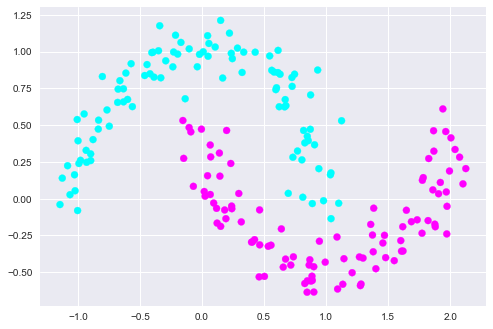

In [631]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap = "cool")
plt.plot()

In [640]:
km = KMeans(n_clusters=2)

In [641]:
km.fit(X)

KMeans(n_clusters=2)

In [645]:
pred = km.labels_
centers = km.cluster_centers_

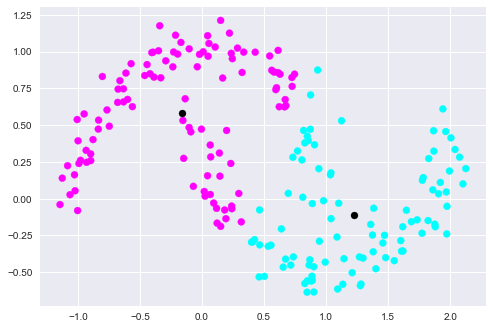

In [653]:
plt.scatter(X[:,0],X[:,1],c=pred,cmap="cool")
plt.scatter(centers[:,0],centers[:,1],color="black")

#### so k-means fails here !!

## DBSCAM

In [655]:
from sklearn.cluster import DBSCAN

In [685]:
 dbs = DBSCAN(eps=.2,min_samples=5,)

In [686]:
dbs.fit(X)

DBSCAN(eps=0.2)

In [687]:
pred =dbs.labels_

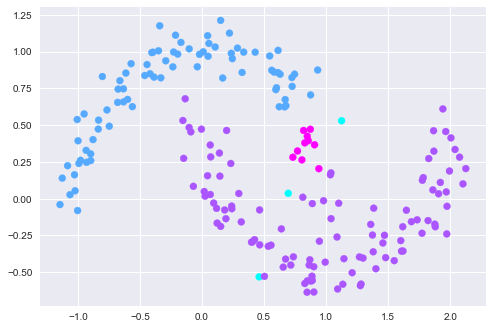

In [688]:
plt.scatter(X[:,0],X[:,1],c=pred,cmap="cool")
# plt.scatter(centers[:,0],centers[:,1],color="black")

In [690]:
### Solved some portion better than kmeans on this problem